In [162]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from decimal import Decimal

# Задание 1



In [163]:
t = np.linspace(0, 2 * np.pi, 1000)
x = 16 * (np.sin(t) ** 3)
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

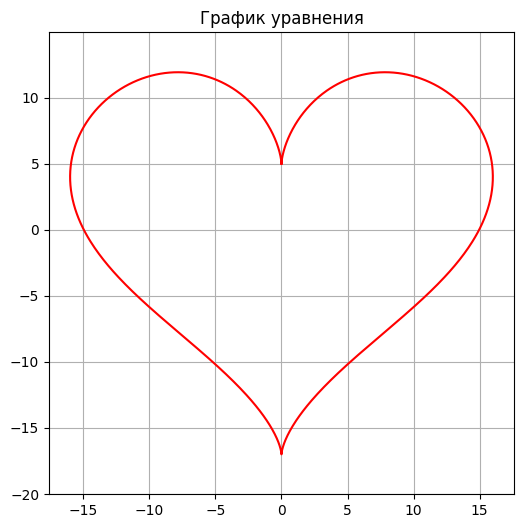

In [164]:
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='red')
plt.title("График уравнения")
plt.grid(True)
plt.axis('equal')
plt.show()

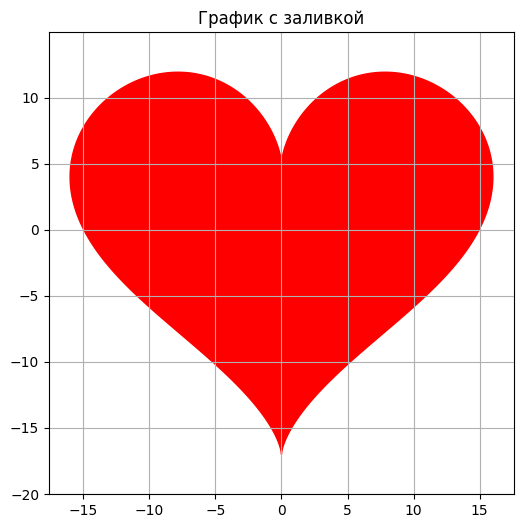

In [165]:
plt.figure(figsize=(6, 6))
plt.fill(x, y, color='red')
plt.title("График с заливкой")
plt.grid(True)
plt.axis('equal')
plt.show()

# Задание 2

In [166]:
def draw(figure_func, bbox=(-1.3, 1.3)):
    xmin, xmax, ymin, ymax, zmin, zmax = bbox * 3
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    a = np.linspace(xmin, xmax, 80)
    b = np.linspace(ymin, ymax, 80)
    a1, a2 = np.meshgrid(a, a)

    for x in b:
        y, z = a1, a2
        X = figure_func(x, y, z)
        cest = ax.contour(X + x, y, z, [x], zdir='x', colors='red')

    for y in b:
        x, z = a1, a2
        X = figure_func(x, y, z)
        cest = ax.contour(x, X + y, z, [y], zdir='y', colors='red')

    for z in b:
        x, y = a1, a2
        X = figure_func(x, y, z)
        cest = ax.contour(x, y, X + z, [z], zdir='z', colors='red')

    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    ax.set_zlim3d(zmin, zmax)
    plt.show()

In [167]:
def graph(x, y, z):
    return (x**2 + (9 * y**2) / 4 + z**2 - 1)**3 - x**2 * z**3 - (9 * y**2 * z**3) / 200

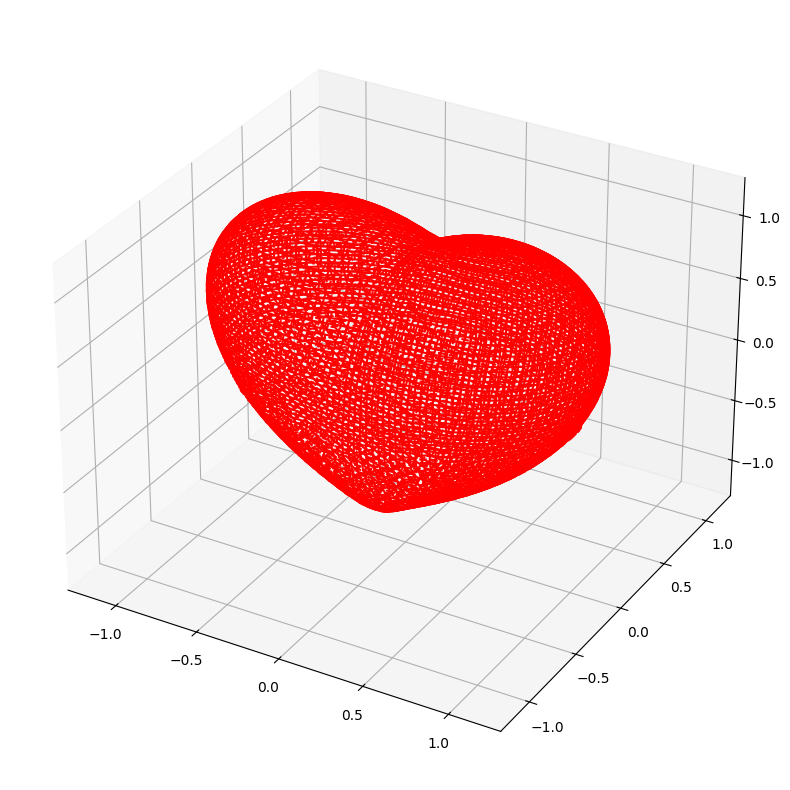

In [168]:
draw(graph)

# Задание 3

In [169]:
def lcg(seed, size):
    a = 1664525
    c = 1013904223
    m = 2**32
    numbers = []
    current = seed
    for _ in range(size):
        current = (a * current + c) % m
        numbers.append(current / m)
    return np.array(numbers)

In [170]:
noise_values = lcg(seed=42, size=1000 * 1000)

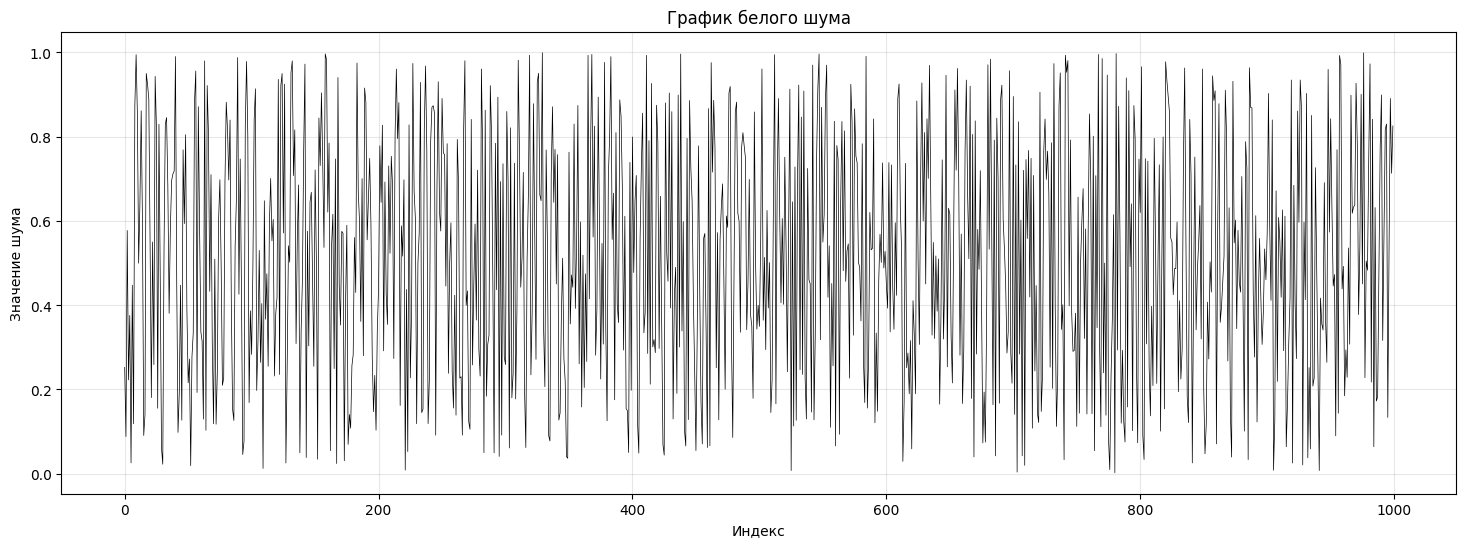

In [171]:
plt.figure(figsize=(18, 6))
plt.plot(noise_values[:1000], color='black', linewidth=0.5)
plt.title('График белого шума')
plt.xlabel('Индекс')
plt.ylabel('Значение шума')
plt.grid(alpha=0.3)
plt.show()

### Задание 4

In [172]:
k = [6, 0, -4, -3, 5, 6, -6, -13, 7, 44, 64, 44, 7, -13, -6, 6, 5, -3, -4, 0, 6]

In [173]:
def float_range(start, stop, step):
    current = start
    while current < stop:
        yield current
        current += step

In [174]:
omega_list = list(float_range(Decimal('0.1'), Decimal('2.1'), Decimal('0.1')))

In [179]:
ex_list = []
for omega in omega_list:
    x_buffer = [0] * len(k)
    max_output = -float('inf')
    min_output = float('inf')
    for t in range(500):
        x_val = round(1000 * math.sin(float(omega) * t))
        x_buffer = [x_val] + x_buffer[:-1]
        y = sum(coef * x for coef, x in zip(k, x_buffer))
        if t > 100:
            if y > max_output: max_output = y
            if y < min_output: min_output = y
    amplitude = (max_output - min_output) / 2
    db = 20 * math.log10(amplitude/1000)
    ex_list.append(db)

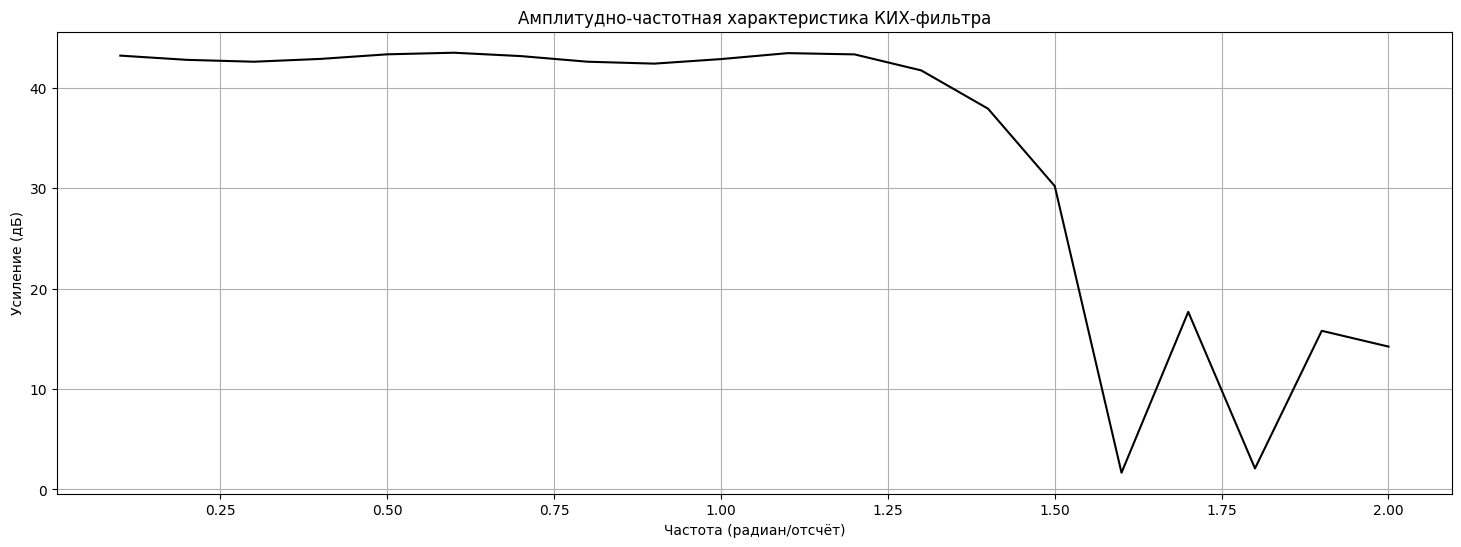

In [180]:
plt.figure(figsize=(18, 6))
plt.plot(omega_list, ex_list, color='black')
plt.xlabel('Частота (радиан/отсчёт)')
plt.ylabel('Усиление (дБ)')
plt.title('Амплитудно-частотная характеристика КИХ-фильтра')
plt.grid(True)
plt.show()